<a href="https://colab.research.google.com/github/rahulrajpr/learning/blob/main/TensorFlowDeveloperCertifcateTraining/TensorFlowDeveloperCertifcateTraining-main/07.TimeSeries/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Model to predict the future bit coin prices based on the past data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

Lets get the helperfuctions.py

In [ ]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py

--2023-03-08 14:03:14--  https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13262 (13K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  12.95K  --.-KB/s    in 0s      

2023-03-08 14:03:14 (31.6 MB/s) - ‘helper_functions.py’ saved [13262/13262]



### Get Data

Data Source : https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-08 14:03:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-03-08 14:03:15 (6.02 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
path = '/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
df = pd.read_csv(path, parse_dates = ['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Currency             2787 non-null   object        
 1   Date                 2787 non-null   datetime64[ns]
 2   Closing Price (USD)  2787 non-null   float64       
 3   24h Open (USD)       2787 non-null   float64       
 4   24h High (USD)       2787 non-null   float64       
 5   24h Low (USD)        2787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 130.8+ KB


Lets clean the dataset
  * Make the date colums as the index
  * Get rid of the unwanted columns 

In [ ]:
bc = df.copy()

bc.rename(columns = {'Date':'date','Closing Price (USD)':'price'}, inplace = True)

bc.set_index('date', inplace = True)
bc = bc[['price']]

bc.sort_index(ascending = True, inplace = True)

bc.head()

,price
date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Lets plot the time series data

In [ ]:
from helper_functions import plot_time_series

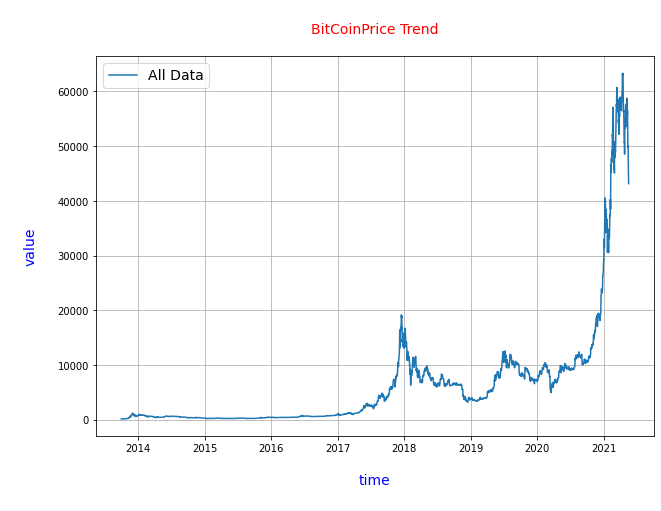

In [ ]:
plot_time_series(timesteps = bc.index,
                 values = bc.price,
                 title = 'BitCoinPrice Trend',
                 label = 'All Data',
                 figsize = (10,7))

### Create the Train and Test Series

Train Size : 80%
Test Size : 20% 

Note : We cannot use the skleran train_test split as it is meaning less to split the train and test dataset randomly, it has follow the order a create a psudo future dataset test as shown in the below image

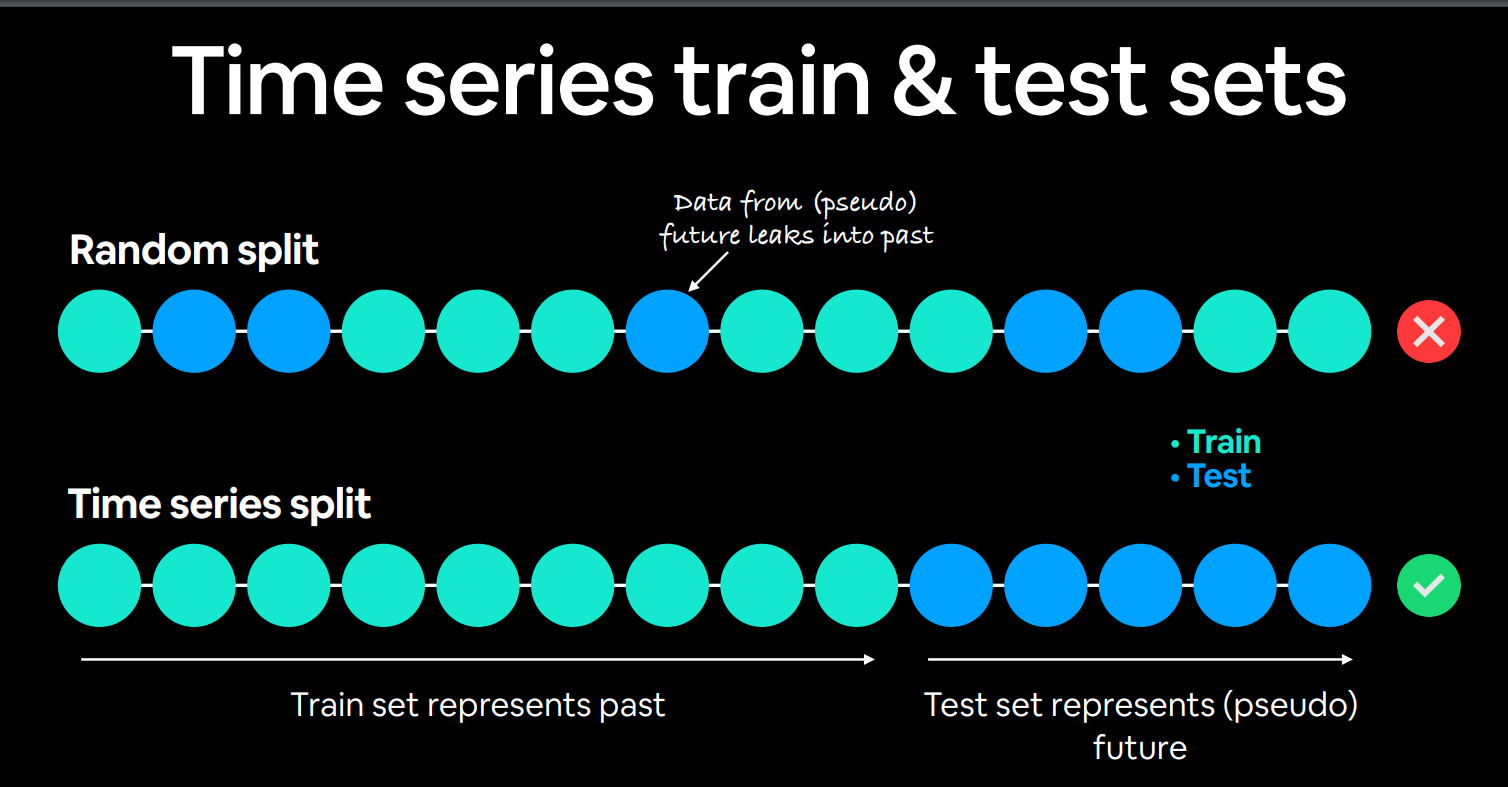

> Lets define variable and the target

In [ ]:
X = bc.index.to_numpy()
y = bc.price.to_numpy()

X.shape, y.shape

((2787,), (2787,))

> Lets define the train size

In [ ]:
train_size = int(0.8*len(X))
train_size

2229

Lets split the dataset into train and the test 

In [ ]:
X_train, y_train, = X[:train_size], y[:train_size]

X_test, y_test = X[train_size:], y[train_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

> Lets plot the train and test sets together

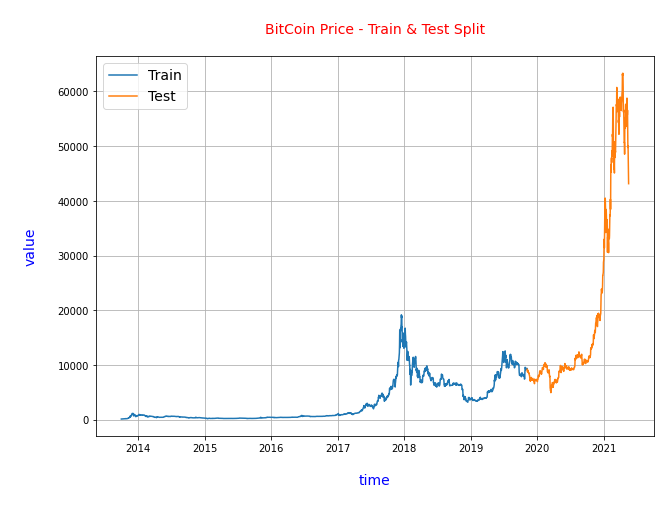

In [ ]:
plot_time_series(X_train,y_train,title = 'BitCoin Price - Train & Test Split', label = 'Train',figsize=(10,7))
plot_time_series(X_test,y_test, label = 'Test')